Importar librerías de visualización

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Estilos de los gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [4]:
file_path = 'accidentes_bucaramanga_2012_limpio.csv'
df = pd.read_csv(file_path)

Distribución por COMUNA, BARRIO y GRAVEDAD

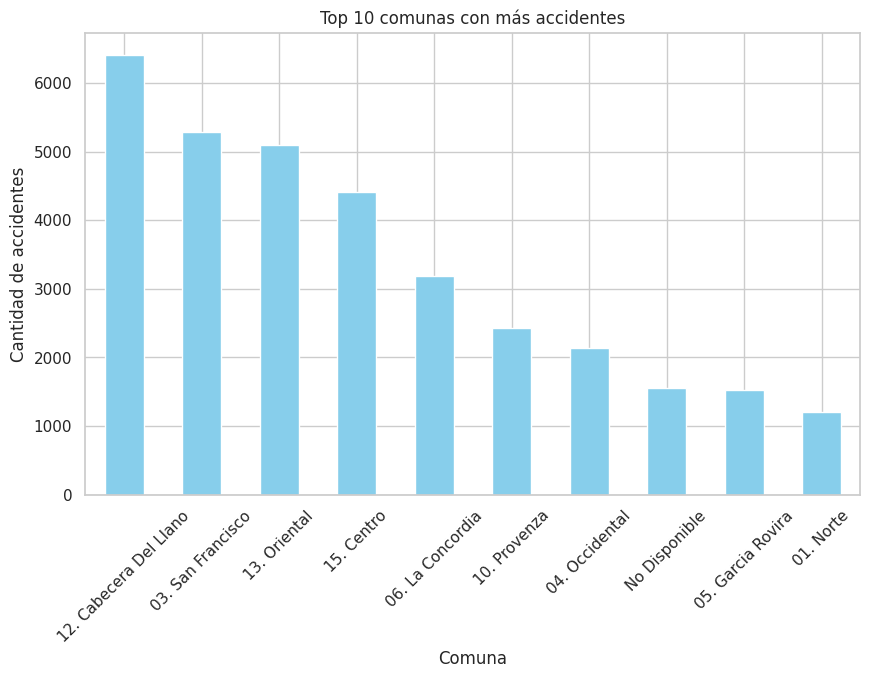

In [5]:
# Top 10 comunas con más accidentes
df['COMUNA'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 comunas con más accidentes')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=45)
plt.show()

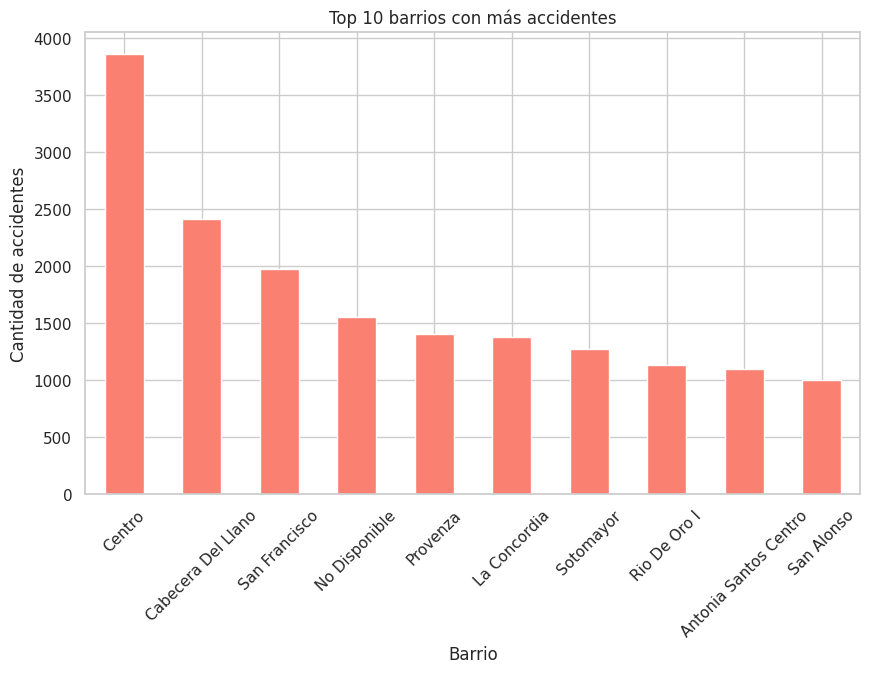

In [6]:
# Top 10 barrios con más accidentes
df['BARRIO'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 barrios con más accidentes')
plt.xlabel('Barrio')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=45)
plt.show()

<ipython-input-7-3b5e8c21963b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='GRAVEDAD', palette='Set2', order=df['GRAVEDAD'].value_counts().index)


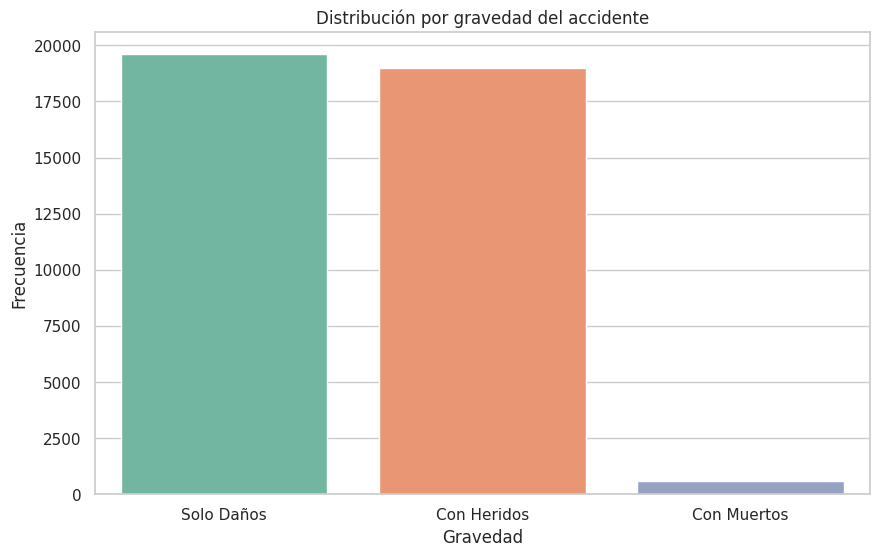

In [7]:
# Distribución por gravedad
sns.countplot(data=df, x='GRAVEDAD', palette='Set2', order=df['GRAVEDAD'].value_counts().index)
plt.title('Distribución por gravedad del accidente')
plt.xlabel('Gravedad')
plt.ylabel('Frecuencia')
plt.show()


Análisis temporal por HORA, DÍA y MES

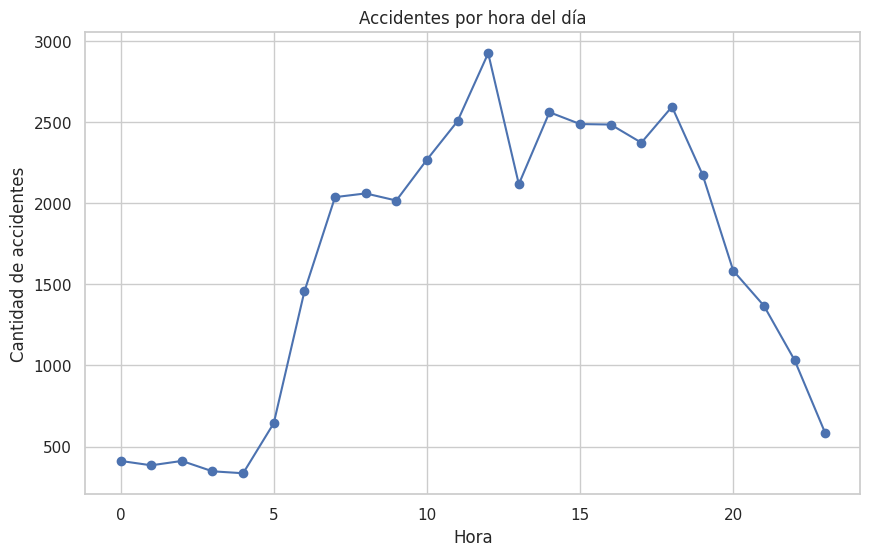

In [8]:
# Accidentes por hora
df['HORA_STR'] = df['HORA'].astype(str).str[:2].astype(int)  # solo hora entera
df['HORA_STR'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Accidentes por hora del día')
plt.xlabel('Hora')
plt.ylabel('Cantidad de accidentes')
plt.grid(True)
plt.show()

<ipython-input-20-1dc479e614da>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='DIA', order=orden_dias, palette='coolwarm')


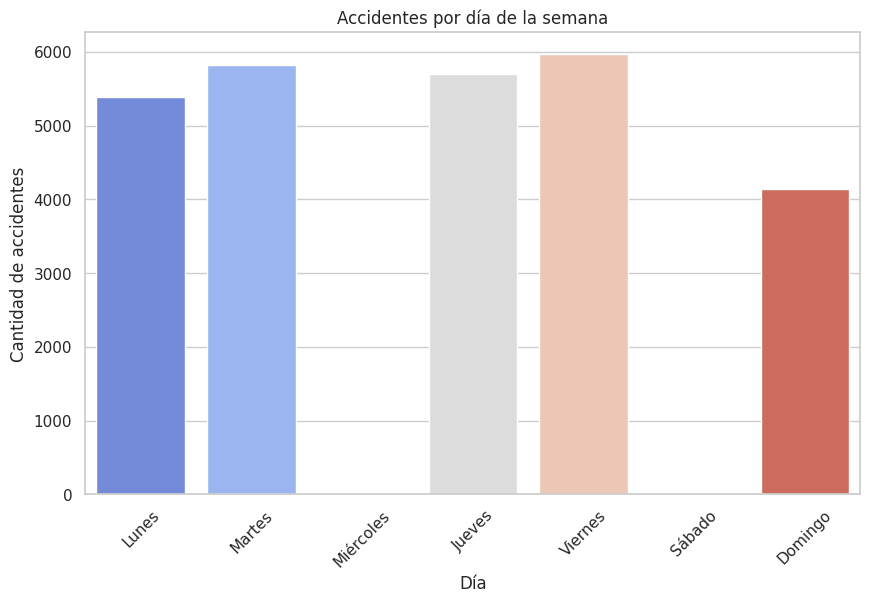

In [20]:
# Extraer solo el nombre del día (lo que está después del punto y espacio)
df['DIA'] = df['DIA'].str.extract(r'\d+\.\s*(\w+)', expand=False)

# Estandarizar formato (por si acaso)
df['DIA'] = df['DIA'].str.strip().str.lower().str.title()

orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Conteo de accidentes por día
sns.countplot(data=df, x='DIA', order=orden_dias, palette='coolwarm')
plt.title('Accidentes por día de la semana')
plt.xlabel('Día')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=45)
plt.show()

<ipython-input-12-10030cdb5ce4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='MES', order=sorted(df['MES'].unique()), palette='viridis')


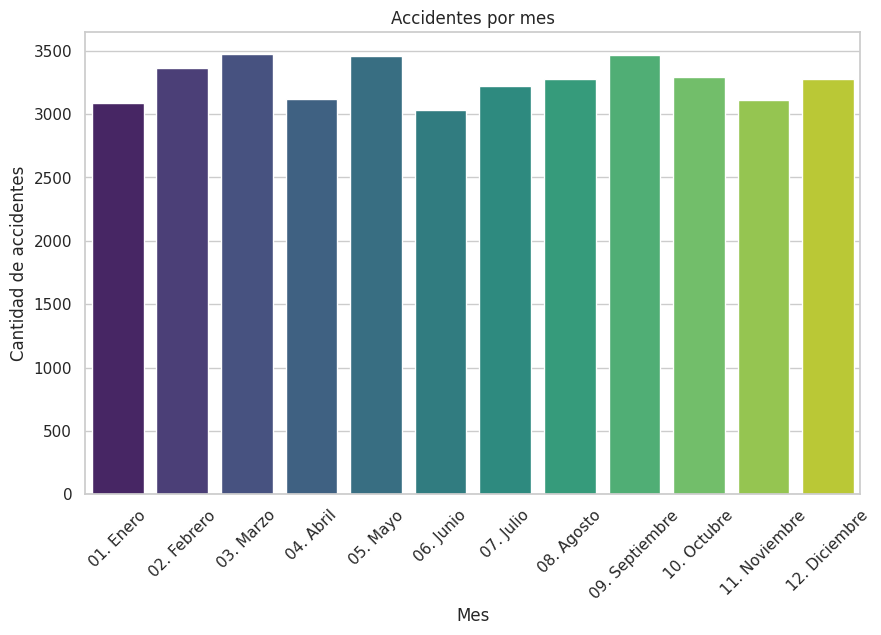

In [12]:
# Accidentes por mes
sns.countplot(data=df, x='MES', order=sorted(df['MES'].unique()), palette='viridis')
plt.title('Accidentes por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=45)
plt.show()

Conteo de accidentes por tipo de vehículo

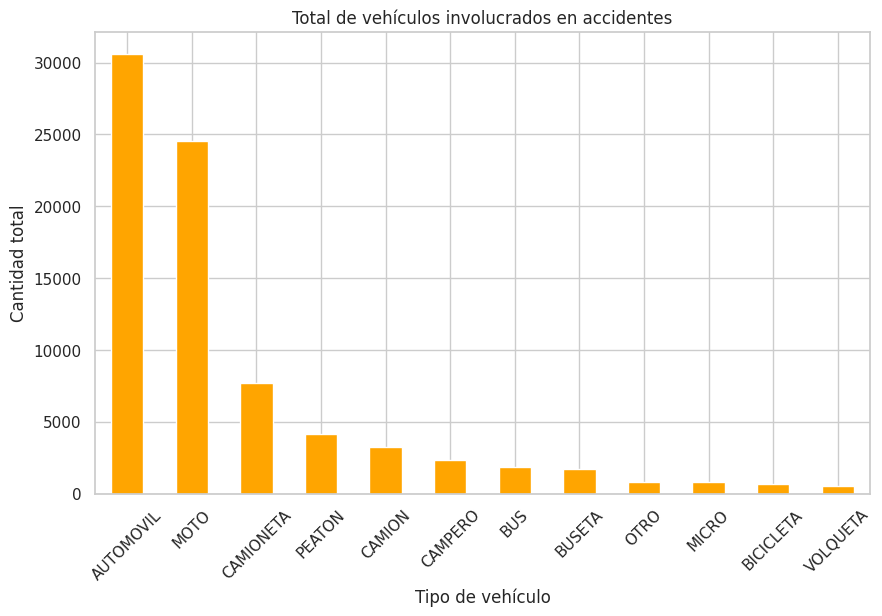

In [13]:
vehiculos = ['PEATON', 'AUTOMOVIL', 'CAMPERO', 'CAMIONETA', 'MICRO', 'BUSETA', 'BUS',
             'CAMION', 'VOLQUETA', 'MOTO', 'BICICLETA', 'OTRO']
conteo_vehiculos = df[vehiculos].sum().sort_values(ascending=False)

conteo_vehiculos.plot(kind='bar', color='orange')
plt.title('Total de vehículos involucrados en accidentes')
plt.ylabel('Cantidad total')
plt.xlabel('Tipo de vehículo')
plt.xticks(rotation=45)
plt.show()

 Matriz de correlación entre variables cuantitativas

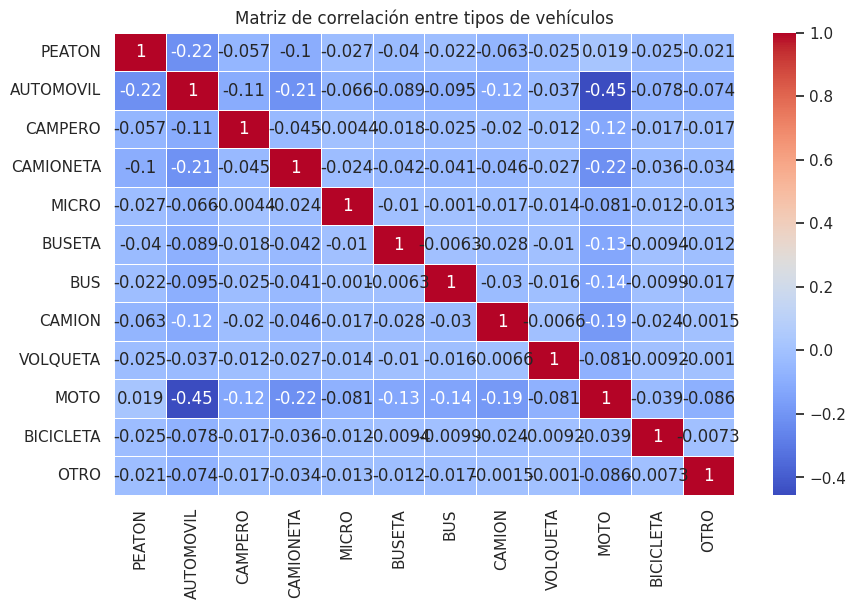

In [14]:
# Selección de columnas numéricas
numericas = df[vehiculos]
corr = numericas.corr()

# Matriz de correlación
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación entre tipos de vehículos')
plt.show()

Visualización de tendencias y agrupamientos

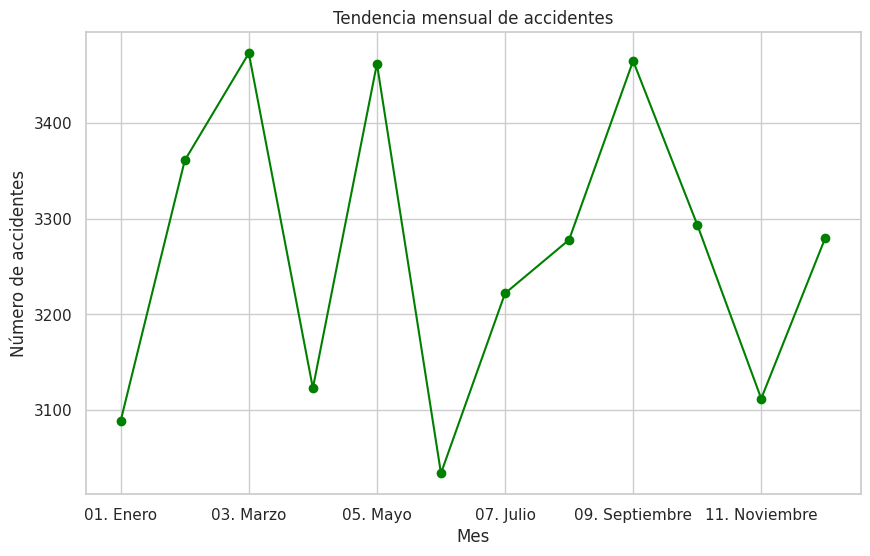

In [15]:
# Tendencia mensual
df_mes = df.groupby('MES').size().reindex(sorted(df['MES'].unique()))
df_mes.plot(kind='line', marker='o', color='green')
plt.title('Tendencia mensual de accidentes')
plt.xlabel('Mes')
plt.ylabel('Número de accidentes')
plt.grid(True)
plt.show()

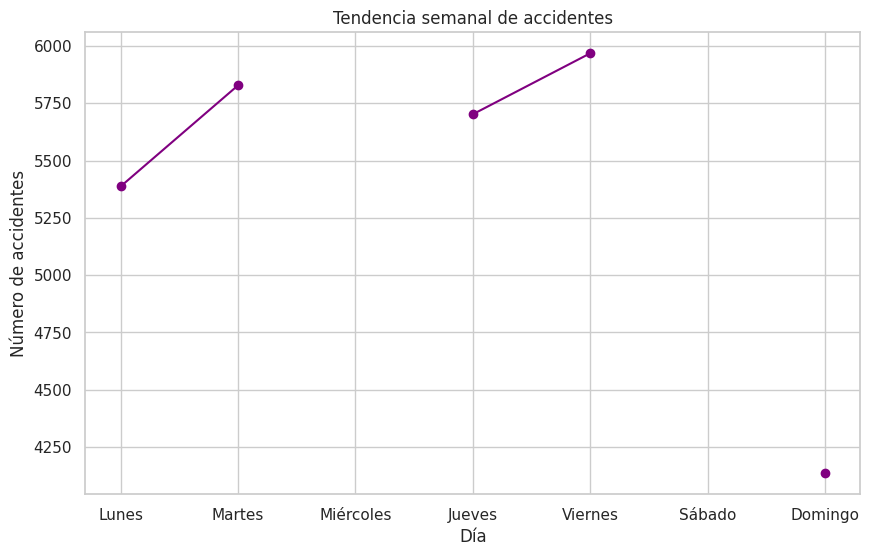

In [21]:
# Tendencia por día
df_dia = df['DIA'].value_counts().reindex(orden_dias)
df_dia.plot(kind='line', marker='o', color='purple')
plt.title('Tendencia semanal de accidentes')
plt.xlabel('Día')
plt.ylabel('Número de accidentes')
plt.grid(True)
plt.show()